In [14]:
import pickle
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math
import numpy as np

In [15]:
with open('primitive_length.pkl', 'rb') as f:
    L = pickle.load(f)
f.close()

with open('one_f_noise_alpha.pkl', 'rb') as f:
    alpha_list = pickle.load(f)
f.close()
print(L)
print(alpha_list)

[ 1  3  5  7  9 11 13 15 17 19 20 30 40 50 60 70 80 90]
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9 2. ]


F_Ciff = 1 - r =  0.9967950913011642
A =  0.7112551397897388


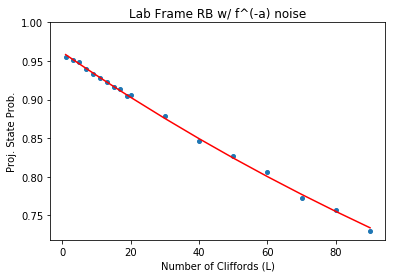

[0.95555572 0.95067127 0.94871437 0.93908646 0.93367569 0.92726552
 0.9222116  0.91656237 0.91300405 0.90518969 0.90626615 0.87837961
 0.84599801 0.82650943 0.80541868 0.77294666 0.75693714 0.72962313]
[0.7055557184990231, 0.700671266053795, 0.6987143654973836, 0.6890864639836926, 0.6836756918527391, 0.6772655211673138, 0.6722116003758135, 0.6665623749048356, 0.6630040528592038, 0.6551896878700846, 0.6562661485280338, 0.6283796112365378, 0.5959980054903862, 0.5765094309792397, 0.5554186790790457, 0.5229466564781672, 0.5069371388267588, 0.47962312862964973]
F_Ciff = 1 - r =  0.9967841988084316
A =  0.7115284557142186


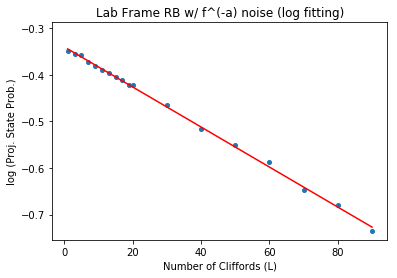

In [25]:
with open('2.pkl', 'rb') as f:
    data = pickle.load(f)
f.close()

y = data[1]
###############
# SRB with fixed B

def func(x, A, r):
    return  A * (1 - 4/3*r)**x + 0.25

popt, pcov = curve_fit(func, L, y, p0=[1, 0], bounds=(0, 1), maxfev=5000)
print("F_Ciff = 1 - r = ", 1 - popt[1])
print("A = ", popt[0])

plt.plot(L, y, 'o', markersize=4)
plt.plot(L, func(L, *popt), 'r-')
plt.ylim(top=1.0)
plt.xlabel("Number of Cliffords (L)")
plt.ylabel("Proj. State Prob.")
plt.title("Lab Frame RB w/ f^(-a) noise")
plt.show()

###############
# Fixed constant term with logarithm
# a = ln(A)
# b = ln(1 - 4/3*r)
def func(x, a, b):
    return  a + b*x

y_fit = [p - 0.25 for p in y]
print(y)
print(y_fit)
y_fit = np.log(np.absolute(y_fit))
# L = L[0:16]
# y_fit = y_fit[0:16]
popt, pcov = curve_fit(func, L, y_fit, p0=[-0.5, -0.5], bounds=[(-0.5, -0.5), (0, 0)], maxfev=5000)
r = 3/4 * (1 - np.exp(popt[1]))
print("F_Ciff = 1 - r = ", 1 - r)
print("A = ", np.exp(popt[0]))

plt.plot(L, y_fit, 'o', markersize=4)
plt.plot(L, func(L, *popt), 'r-')
plt.ylim(top=np.log(0.75))
plt.xlabel("Number of Cliffords (L)")
plt.ylabel("log (Proj. State Prob.)")
plt.title("Lab Frame RB w/ f^(-a) noise (log fitting)")
plt.show()

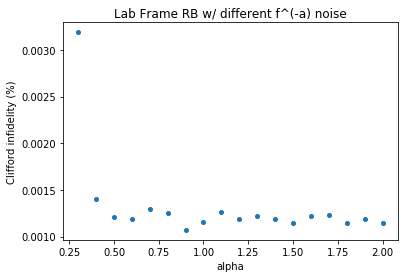

[0.07820265 0.0270813  0.00318835 0.0014016  0.00121377 0.00118302
 0.00129568 0.00124824 0.00107126 0.00115964 0.0012583  0.001187
 0.00121979 0.00118881 0.00114852 0.00122097 0.00123234 0.00114135
 0.00118664 0.00114718]


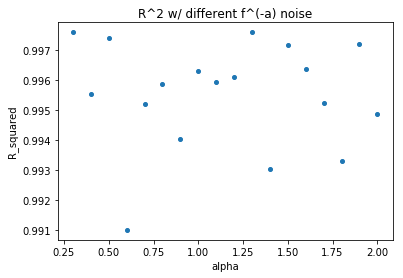

In [28]:
###############
# SRB with fixed B

# def func(x, A, r):
#     return  A * (1 - 4/3*r)**x + 0.25

###############
# Fixed constant term with logarithm
# a = ln(A)
# b = ln(1 - 4/3*r)

def func(x, a, b):
    return  a + b*x

F_Clifford = np.zeros(len(alpha_list))
r_sqrd = np.zeros(len(alpha_list))

for i in range(len(alpha_list)):
    with open(str(i) + '.pkl', 'rb') as f:
        data = pickle.load(f)
    f.close()
    
    noise_index = data[0]
    y = data[1]
    
    ###############
    # SRB with fixed B
#     popt, pcov = curve_fit(func, L, y, p0=[1, 0], bounds=(0, 1), maxfev=5000)
#     F_Clifford[i] = popt[1] * 100

#     residuals = y - func(L, *popt)
#     ss_res = np.sum(residuals**2)
#     ss_tot = np.sum((y - np.mean(y))**2)
#     r_sqrd[i] = 1 - (ss_res/ss_tot)
    
    ###############
    # Fixed constant term with logarithm
    y_fit = [p - 0.25 for p in y]
    y_fit = np.log(np.absolute(y_fit))
    L = L[0:16]
    y_fit = y_fit[0:16]
    popt, pcov = curve_fit(func, L, y_fit, p0=[-0.5, -0.5], bounds=[(-0.5, -0.5), (0, 0)], maxfev=5000)
    F_Clifford[i] = 3/4 * (1 - np.exp(popt[1]))
    
    residuals = y_fit - func(L, *popt)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y_fit - np.mean(y_fit))**2)
    r_sqrd[i] = 1 - (ss_res/ss_tot)
    ###############

plot1 = plt.figure(1)
plt.plot(alpha_list[2:], F_Clifford[2:], 'o', markersize=4)
plt.xlabel("alpha")
plt.ylabel("Clifford infidelity (%)")
plt.title("Lab Frame RB w/ different f^(-a) noise")
plt.show()

print(F_Clifford)
plot2 = plt.figure(2)
plt.plot(alpha_list[2:], r_sqrd[2:], 'o', markersize=4)
plt.xlabel("alpha")
plt.ylabel("R_squared")
plt.title("R^2 w/ different f^(-a) noise")
plt.show()